In [1]:
# Uncomment the following lines if you are using Windows!
import findspark
#findspark.init()
#findspark.find()

import pyspark

from pyspark.sql import SparkSession
from pyspark import SparkContext, SQLContext

appName = "Big Data Analytics"
master = "local"

# Create Configuration object for Spark.
conf = pyspark.SparkConf()\
    .set('spark.driver.host','127.0.0.1')\
    .setAppName(appName)\
    .setMaster(master)

# Create Spark Context with the new configurations rather than relying on the default one
sc = SparkContext.getOrCreate(conf=conf)

# You need to create SQL Context to conduct some database operations like what we will see later.
sqlContext = SQLContext(sc)

# If you have SQL context, you create the session from the Spark Context
spark = sqlContext.sparkSession.builder.getOrCreate()

23/11/15 22:56:56 WARN Utils: Your hostname, Jacks-MacBook-Pro-2.local resolves to a loopback address: 127.0.0.1; using 10.0.0.14 instead (on interface en0)
23/11/15 22:56:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/15 22:56:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/Users/jd362/anaconda3/lib/python3.11/site-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [2]:
from pyspark.sql.functions import col,lit
from pyspark.sql.types import *

schema = StructType([
    StructField('sofifa_id', IntegerType(), False), #id cannot be null
    StructField('player_url', StringType(), True),
    StructField('short_name', StringType(), True),
    StructField('long_name', StringType(), True),
    StructField('player_positions', StringType(), True),
    StructField('overall', ShortType(), True),
    StructField('potential', ShortType(), True),
    StructField('value_eur', FloatType(), True),
    StructField('wage_eur', FloatType(), True),
    StructField('age', ShortType(), True),
    StructField('dob', TimestampType(), True),
    StructField('height_cm', ShortType(), True),
    StructField('weight_kg', ShortType(), True),
    StructField('club_team_id', FloatType(), True),
    StructField('club_name', StringType(), True),
    StructField('league_name', StringType(), True),
    StructField('league_level', ShortType(), True),
    StructField('club_position', StringType(), True),
    StructField('club_jersey_number', ShortType(), True),
    StructField('club_loaned_from', StringType(), True),
    StructField('club_joined', TimestampType(), True),
    StructField('club_contract_valid_until', ShortType(), True),
    StructField('nationality_id', ShortType(), True),
    StructField('nationality_name', StringType(), True),
    StructField('nation_team_id', FloatType(), True),
    StructField('nation_position', StringType(), True),
    StructField('nation_jersey_number', ShortType(), True),
    StructField('preferred_foot', StringType(), True),
    StructField('weak_foot', ShortType(), True),
    StructField('skill_moves', ShortType(), True),
    StructField('international_reputation', ShortType(), True),
    StructField('work_rate', StringType(), True),
    StructField('body_type', StringType(), True),
    StructField('real_face', StringType(), True),
    StructField('release_clause_eur', IntegerType(), True), #mostly empty
    StructField('player_tags', StringType(), True),
    StructField('player_traits', StringType(), True),
    StructField('pace', ShortType(), True),
    StructField('shooting', ShortType(), True),
    StructField('passing', ShortType(), True),
    StructField('dribbling', ShortType(), True),
    StructField('defending', ShortType(), True),
    StructField('physic', ShortType(), True),
    StructField('attacking_crossing', ShortType(), True),
    StructField('attacking_finishing', ShortType(), True),
    StructField('attacking_heading_accuracy', ShortType(), True),
    StructField('attacking_short_passing', ShortType(), True),
    StructField('attacking_volleys', ShortType(), True),
    StructField('skill_dribbling', ShortType(), True),
    StructField('skill_curve', ShortType(), True),
    StructField('skill_fk_accuracy', ShortType(), True),
    StructField('skill_long_passing', ShortType(), True),
    StructField('skill_ball_control', ShortType(), True),
    StructField('movement_acceleration', ShortType(), True),
    StructField('movement_sprint_speed', ShortType(), True),
    StructField('movement_agility', ShortType(), True),
    StructField('movement_reactions', ShortType(), True),
    StructField('movement_balance', ShortType(), True),
    StructField('power_shot_power', ShortType(), True),
    StructField('power_jumping', ShortType(), True),
    StructField('power_stamina', ShortType(), True),
    StructField('power_strength', ShortType(), True),
    StructField('power_long_shots', ShortType(), True),
    StructField('mentality_aggression', ShortType(), True),
    StructField('mentality_interceptions', ShortType(), True),
    StructField('mentality_positioning', ShortType(), True),
    StructField('mentality_vision', ShortType(), True),
    StructField('mentality_penalties', ShortType(), True),
    StructField('mentality_composure', ShortType(), True), #empty, assuming it is shortType
    StructField('defending_marking_awareness', ShortType(), True),
    StructField('defending_standing_tackle', ShortType(), True),
    StructField('defending_sliding_tackle', ShortType(), True),
    StructField('goalkeeping_diving', ShortType(), True),
    StructField('goalkeeping_handling', ShortType(), True),
    StructField('goalkeeping_kicking', ShortType(), True),
    StructField('goalkeeping_positioning', ShortType(), True),
    StructField('goalkeeping_reflexes', ShortType(), True),
    StructField('goalkeeping_speed', ShortType(), True),
    StructField('ls', StringType(), True),
    StructField('st', StringType(), True),
    StructField('rs', StringType(), True),
    StructField('lw', StringType(), True),
    StructField('lf', StringType(), True),
    StructField('cf', StringType(), True),
    StructField('rf', StringType(), True),
    StructField('rw', StringType(), True),
    StructField('lam', StringType(), True),
    StructField('cam', StringType(), True),
    StructField('ram', StringType(), True),
    StructField('lm', StringType(), True),
    StructField('lcm', StringType(), True),
    StructField('cm', StringType(), True),
    StructField('rcm', StringType(), True),
    StructField('rm', StringType(), True),
    StructField('lwb', StringType(), True),
    StructField('ldm', StringType(), True),
    StructField('cdm', StringType(), True),
    StructField('rdm', StringType(), True),
    StructField('rwb', StringType(), True),
    StructField('lb', StringType(), True),
    StructField('lcb', StringType(), True),
    StructField('cb', StringType(), True),
    StructField('rcb', StringType(), True),
    StructField('rb', StringType(), True),
    StructField('gk', StringType(), True),
    StructField('player_face_url', StringType(), True),
    StructField('club_logo_url', StringType(), True),
    StructField('club_flag_url', StringType(), True),
    StructField('nation_logo_url', StringType(), True),
    StructField('nation_flag_url', StringType(), True),
    StructField('year', ShortType(), False)
])

df_all_year = spark.createDataFrame([], schema)
# Add year column
for i in range(15,23):
    file_name = "./data/players_" + str(i) + ".csv"
    df = spark.read.csv(file_name,header=True, schema= schema)
    df_added_column = df.withColumn("year", lit(i).cast("short"))
    df_all_year = df_all_year.union(df_added_column)
#df_all_year.show(vertical = True)


In [3]:
#Task 1 - ingest data


#df.show(vertical=True)


db_properties={}
#update your db username
db_properties['username']="postgres"
#update your db password
db_properties['password']="Dyx13313212151"
#make sure you got the right port number here
db_properties['url']= "jdbc:postgresql://localhost:5432/postgres"
#make sure you had the Postgres JAR file in the right location
db_properties['driver']="org.postgresql.Driver"
db_properties['table']= "fifa"


df_all_year.write.format("jdbc")\
.mode("overwrite")\
.option("url", db_properties['url'])\
.option("dbtable", db_properties['table'])\
.option("user", db_properties['username'])\
.option("password", db_properties['password'])\
.option("Driver", db_properties['driver'])\
.save()

df_read = sqlContext.read.format("jdbc")\
    .option("url", db_properties['url'])\
    .option("dbtable", db_properties['table'])\
    .option("user", db_properties['username'])\
    .option("password", db_properties['password'])\
    .option("Driver", db_properties['driver'])\
    .load()

df_read.show(1, vertical=True)





23/11/15 22:57:07 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


-RECORD 0-------------------------------------------
 sofifa_id                   | 158023               
 player_url                  | https://sofifa.co... 
 short_name                  | L. Messi             
 long_name                   | Lionel Andrés Mes... 
 player_positions            | CF                   
 overall                     | 93                   
 potential                   | 95                   
 value_eur                   | 1.005E8              
 wage_eur                    | 550000.0             
 age                         | 27                   
 dob                         | 1987-06-24 00:00:00  
 height_cm                   | 169                  
 weight_kg                   | 67                   
 club_team_id                | 241.0                
 club_name                   | FC Barcelona         
 league_name                 | Spain Primera Div... 
 league_level                | 1                    
 club_position               | CF             

In [4]:
col_all = df_read.columns

In [5]:
#Task II
from pyspark.sql.functions import count
from pyspark.sql import functions as F

def clubs_w_highest_num_players_contract_end_2023(x):

    #What are the X clubs that have the highest number of players with contracts ending in 2023?
    df_2022 = df_read.filter(df_read.year == 22)
    df_players = df_2022.filter(df_2022.club_contract_valid_until == 2023)
    #df_count is a dataframe containing club_name and the number of players they have
    df_count = df_players.groupBy("club_name").agg(count("*").alias("num_players"))
    df_count = df_count.orderBy("num_players", ascending=False)


    # filter the table to only contain club with max number of players
    top_club_row = df_count.limit(x)
    max_club_names = [row['club_name'] for row in top_club_row.collect()]
    print("Clubs with highest number of players with contracts ending in 2023 are")
    for club_name in max_club_names:
        print(club_name)

clubs_w_highest_num_players_contract_end_2023(5)



Clubs with highest number of players with contracts ending in 2023 are

En Avant de Guingamp
Club Atlético Lanús
Lechia Gdańsk
Barnsley
Kasimpaşa SK


In [6]:
#Task II - List the Y clubs with highest average number of players that are older than 27 years across all years

from pyspark.sql.functions import countDistinct, sum, desc, col
def highest_num_avg_palyers_older27(y):
    # since not all clubs available for specific year,
    #count years available for each clib
    cnt_years = df_read.groupBy("club_name").agg(countDistinct("year").alias("num_years"))

    # only players that are 27 years and older
    old_players = df_read.filter(df_read.age >27)
    df_old_players = old_players.groupBy("club_name", "year").agg(count("sofifa_id").alias("player_count"))

    # sum up all the players for each club for all years
    df_sum_players = df_old_players.groupBy("club_name").agg(sum("player_count").alias("total_player_count"))

    # join with cnt_years and calculate resulting average
    df_tot_players_years_comb = df_sum_players.join(cnt_years, "club_name")

    # calculate the average number of players 
    df_tot_players_years_comb = df_tot_players_years_comb.withColumn("avgerage_players", (col("total_player_count") / col("num_years")))

    #descending order 
    final_df = df_tot_players_years_comb.select("club_name", "avgerage_players").orderBy(desc("avgerage_players"))

    # Find the value of avgerage_players at the yth position
    boundary_value = final_df.select("avgerage_players").limit(y).collect()[-1][0]

    # Filter rows with avgerage_players greater than or equal to the boundary_value
    final_df = final_df.filter(col("avgerage_players") >= boundary_value)

    final_df.show()

highest_num_avg_palyers_older27(6)

+--------------------+----------------+
|           club_name|avgerage_players|
+--------------------+----------------+
|  Dorados de Sinaloa|            19.0|
| Matsumoto Yamaga FC|            19.0|
| Shanghai Shenhua FC|            18.5|
|          Qingdao FC|            18.0|
|Club Deportivo Jo...|            17.5|
|            Altay SK|            17.0|
|         Guaireña FC|            17.0|
+--------------------+----------------+



In [7]:
#Task II - What is the most frequent nation_position in the dataset for each year?
for currentYear in range(15,23):
    df_2022 = df_read.filter(df_read.year == i)
    #df_count is a dataframe containing nation_position and the number of players they have
    df_count = df_2022.groupBy("nation_position").agg(count("*").alias("num_players"))
    df_count = df_count.orderBy("num_players", ascending=False)
    df_count = df_count.filter(df_count.nation_position.isNotNull())

    # filter the table to only contain nation_position with max number of players
    top_club_row = df_count.head()
    max_players = top_club_row["num_players"]
    df_count = df_count.filter(df_count.num_players == max_players)

    # Collect the club names into a Python list
    max_club_names = [row['nation_position'] for row in df_count.collect()]
    print("Most frequent nation_position in year 20" + str(currentYear) + " is:")
    print(max_club_names)

Most frequent nation_position in year 2015 is:
['SUB']
Most frequent nation_position in year 2016 is:
['SUB']
Most frequent nation_position in year 2017 is:
['SUB']
Most frequent nation_position in year 2018 is:
['SUB']
Most frequent nation_position in year 2019 is:
['SUB']
Most frequent nation_position in year 2020 is:
['SUB']
Most frequent nation_position in year 2021 is:
['SUB']
Most frequent nation_position in year 2022 is:
['SUB']


In [7]:
# Taks 3: Data Cleaning

In [8]:


nominal = ["club_name",'nationality_name',"work_rate",
          "player_tags","player_traits",]
binary = ["preferred_foot", ]
continuous = ["sofifa_id", "overall","potential","wage_eur", "age","height_cm", "weight_kg","weak_foot",
              "skill_moves", "international_reputation", "pace", "shooting", "passing", "dribbling", "defending", "physic",
            "attacking_crossing", "attacking_finishing",
            "attacking_heading_accuracy", "attacking_short_passing", 
            "attacking_volleys", "skill_dribbling", "skill_curve", 
            "skill_fk_accuracy", "skill_long_passing", "skill_ball_control",
            "movement_acceleration", "movement_sprint_speed", "movement_agility", 
            "movement_reactions","movement_balance", "power_shot_power",
            "power_jumping", "power_stamina", "power_strength", 
            "power_long_shots", "mentality_aggression", "mentality_interceptions",
            "mentality_positioning","mentality_vision", "mentality_penalties",
            "mentality_composure", "defending_marking_awareness",
            "defending_standing_tackle", "defending_sliding_tackle",
            "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", 
            "goalkeeping_positioning", "goalkeeping_reflexes", "goalkeeping_speed",
            "ls","st","rs","lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm",
            "cm","rcm","rm","lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb","gk",'year']


dropped_col = ['player_url', 'short_name','long_name', 'dob', 'club_team_id', 
               'league_name', 'league_level', 'club_jersey_number', 'club_loaned_from', 
               'club_joined', 'club_contract_valid_until', 'nationality_id',  
               'nation_team_id', 'nation_jersey_number', 'body_type', 'real_face', 
               'release_clause_eur', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url',
               'nation_flag_url', 'player_positions', "club_position", 'nation_position']




In [9]:
df_process = df_read


In [10]:
for i in dropped_col:
    df_process = df_process.drop(i)
df_process.columns

['sofifa_id',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'club_name',
 'nationality_name',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defen

In [11]:
from pyspark.sql.functions import *

null_counts_plays_df = df_process.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
                        for c in df_process.columns])

null_counts_plays_df.show(truncate=False, vertical=True)

-RECORD 0-----------------------------
 sofifa_id                   | 0      
 overall                     | 0      
 potential                   | 0      
 value_eur                   | 1897   
 wage_eur                    | 1622   
 age                         | 0      
 height_cm                   | 0      
 weight_kg                   | 0      
 club_name                   | 1630   
 nationality_name            | 0      
 preferred_foot              | 0      
 weak_foot                   | 0      
 skill_moves                 | 0      
 international_reputation    | 0      
 work_rate                   | 0      
 player_tags                 | 130765 
 player_traits               | 78771  
 pace                        | 15791  
 shooting                    | 15791  
 passing                     | 15791  
 dribbling                   | 15791  
 defending                   | 15791  
 physic                      | 15791  
 attacking_crossing          | 0      
 attacking_finishing     

In [12]:
# drop nation_position column, player_tags,player_traits since more than 50% of rows are missing
# drop rows that contain the missing values under those columns:
# value_eur,wage_eur,club_name, club_position sicne they comprise a small percentage from the rest of the data

In [13]:
# Drop columns 'nation_position', 'player_tags', 'player_traits'
df_process = df_process.drop('nation_position', 'player_tags', 'player_traits')

# Drop rows with missing values in 'value_eur', 'wage_eur', 'club_name'
df_process = df_process.dropna(subset=['value_eur', 'wage_eur', 'club_name'])


In [14]:
from pyspark.sql.functions import *

null_counts_plays_df = df_process.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
                        for c in df_process.columns])

null_counts_plays_df.show(truncate=False, vertical=True)

-RECORD 0-----------------------------
 sofifa_id                   | 0      
 overall                     | 0      
 potential                   | 0      
 value_eur                   | 0      
 wage_eur                    | 0      
 age                         | 0      
 height_cm                   | 0      
 weight_kg                   | 0      
 club_name                   | 0      
 nationality_name            | 0      
 preferred_foot              | 0      
 weak_foot                   | 0      
 skill_moves                 | 0      
 international_reputation    | 0      
 work_rate                   | 0      
 pace                        | 15543  
 shooting                    | 15543  
 passing                     | 15543  
 dribbling                   | 15543  
 defending                   | 15543  
 physic                      | 15543  
 attacking_crossing          | 0      
 attacking_finishing         | 0      
 attacking_heading_accuracy  | 0      
 attacking_short_passing 

In [15]:
# replace goalkeeping_speed's missing values with 0
df_process = df_process.na.fill({'goalkeeping_speed': 0})


In [16]:
#preprocessing
# change preferred_foot to binary: replace "Right" with 1 and "Left" with 0
from pyspark.sql.functions import col, when
df_filtered = df_process
df_filtered = df_filtered.withColumn(
    "preferred_foot_binary",
    when(col("preferred_foot") == "Right", 1).otherwise(0))

# Drop the original column
df_filtered = df_filtered.drop("preferred_foot")


In [17]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# List of columns to impute
impune_cols = ["pace",        
 "shooting",                   
 "passing",                    
 "dribbling",                   
 "defending",                
 "physic",                      
 "mentality_composure"]

# Iterate over each column in immune_cols and apply imputation
for col_name in impune_cols:
    # Check the data type of the column
    dtype = df_filtered.schema[col_name].dataType

    # Window specification for partitioning by 'sofifa_id'
    windowSpec = Window.partitionBy('sofifa_id')

    if isinstance(dtype, (FloatType, IntegerType)):  # For numerical columns
        # Calculate the average for the column
        avg_col = df_filtered.withColumn('avg_' + col_name, F.avg(F.col(col_name)).over(windowSpec))

        # Replace nulls with the average
        df_filtered = avg_col.withColumn(col_name, 
            F.when(F.col(col_name).isNull(), F.col('avg_' + col_name)).otherwise(F.col(col_name)))

    elif isinstance(dtype, StringType):  # For categorical columns
        # Calculate the most frequent value (mode) for the column
        mode_col = df_filtered.groupBy('sofifa_id', col_name).count().orderBy('count', ascending=False).first()[col_name]

        # Replace nulls with the mode
        df_filtered = df_filtered.withColumn(col_name, 
            F.when(F.col(col_name).isNull(), F.lit(mode_col)).otherwise(F.col(col_name)))

    # Drop the temporary column used for calculations
    df_filtered = df_filtered.drop('avg_' + col_name)

In [18]:
df_filled = df_filtered
from pyspark.sql import functions as F
from pyspark.sql.window import Window



# Ensure 'pace' column is of a numeric type (convert if necessary)
df_filled = df_filled.withColumn('pace', F.col('pace').cast('float'))

# Replace various forms of nulls with standard nulls
df_filled = df_filled.withColumn('pace', 
                                 F.when(F.col('pace').isin("null", "None", "", -1), None)
                                 .otherwise(F.col('pace')))

# Window specification for partitioning by 'sofifa_id'
windowSpec = Window.partitionBy('sofifa_id')

# Calculate the average 'pace' for each 'sofifa_id'
average_pace = df_filled.withColumn('avg_pace', F.avg('pace').over(windowSpec))

# Replace null values in 'pace' with the average 'pace' for that 'sofifa_id'
df_filled = average_pace.withColumn('pace', 
    F.when(F.col('pace').isNull(), F.col('avg_pace')).otherwise(F.col('pace')))

# Drop rows where the average pace (and thus all paces) is null
df_filled = df_filled.filter(F.col('avg_pace').isNotNull()).drop('avg_pace')

# Check for null values again
null_counts_plays_df = df_filled.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) \
                        for c in df_filled.columns])
null_counts_plays_df.show(truncate=False, vertical=True)


-RECORD 0----------------------------
 sofifa_id                   | 0     
 overall                     | 0     
 potential                   | 0     
 value_eur                   | 0     
 wage_eur                    | 0     
 age                         | 0     
 height_cm                   | 0     
 weight_kg                   | 0     
 club_name                   | 0     
 nationality_name            | 0     
 weak_foot                   | 0     
 skill_moves                 | 0     
 international_reputation    | 0     
 work_rate                   | 0     
 pace                        | 0     
 shooting                    | 25    
 passing                     | 25    
 dribbling                   | 25    
 defending                   | 25    
 physic                      | 25    
 attacking_crossing          | 0     
 attacking_finishing         | 0     
 attacking_heading_accuracy  | 0     
 attacking_short_passing     | 0     
 attacking_volleys           | 0     
 skill_dribb

In [19]:
# drop the rest of the rows since they have 8 missing values for each sofifa_id
# Drop rows that have null values in any column
df_filled_no_nulls = df_filled.dropna()

# Check for null values again
null_counts_no_nulls_df = df_filled_no_nulls.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) \
                                                    for c in df_filled_no_nulls.columns])
null_counts_no_nulls_df.show(truncate=False, vertical=True)


-RECORD 0--------------------------
 sofifa_id                   | 0   
 overall                     | 0   
 potential                   | 0   
 value_eur                   | 0   
 wage_eur                    | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 club_name                   | 0   
 nationality_name            | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 work_rate                   | 0   
 pace                        | 0   
 shooting                    | 0   
 passing                     | 0   
 dribbling                   | 0   
 defending                   | 0   
 physic                      | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                

In [20]:
# we cleaned null values
# for the following, split into base ( first number, number after blus is the boost)
# if the + is missing, treat number as a base and set boost to 0

In [21]:
#edited split function

from pyspark.sql.functions import udf
from pyspark.sql.functions import col


# Assuming 'df' is your DataFrame
# List of columns to process
base_boost_cols = [
    "ls", "st", "rs", "lw", "lf", "cf", "rf", "rw", "lam", "cam", "ram",
    "lm", "lcm", "cm", "rcm", "rm", "lwb", "ldm", "cdm", "rdm", "rwb",
    "lb", "lcb", "cb", "rcb", "rb", "gk"
]

def split_base_boost(str):
    if "+" in str:
        parts = str.split("+")
        base = int(parts[0])
        boost = int(parts[1])
        return (base, boost)
    elif "-" in str:
        parts = str.split("-")
        base = int(parts[0])
        boost = int(parts[1])*-1
        return (base, boost)
    else:
        base = int(str)
        boost = 0
        return (base, boost)

new_schema = StructType([
    StructField("base", IntegerType(), nullable=True),
    StructField("boost", IntegerType(), nullable=True)
])
split_base_boost_udf = udf(split_base_boost, new_schema)

df_filled_splitscore = df_filled_no_nulls
for column_name in base_boost_cols:

    # Apply the UDF and create a struct column
    df_filled_splitscore = df_filled_splitscore.withColumn("split_values", split_base_boost_udf(col(column_name)))

    # Extract base and boost into separate columns
    df_filled_splitscore = df_filled_splitscore.withColumn(f"{column_name}_base", col("split_values").getField("base")) \
           .withColumn(f"{column_name}_boost", col("split_values").getField("boost")) \
           .drop("split_values").drop(column_name)

df_filled_splitscore.show(1,vertical = True)

df_filled_no_nulls = df_filled_splitscore



-RECORD 0------------------------------------
 sofifa_id                   | 16            
 overall                     | 70            
 potential                   | 70            
 value_eur                   | 450000.0      
 wage_eur                    | 8000.0        
 age                         | 35            
 height_cm                   | 177           
 weight_kg                   | 69            
 club_name                   | KAS Eupen     
 nationality_name            | Spain         
 weak_foot                   | 3             
 skill_moves                 | 3             
 international_reputation    | 1             
 work_rate                   | Medium/Medium 
 pace                        | 61.0          
 shooting                    | 68            
 passing                     | 71            
 dribbling                   | 70            
 defending                   | 48            
 physic                      | 63            
 attacking_crossing          | 69 

In [22]:
# for  club_name, nationality_name use string encoder
from pyspark.ml.feature import StringIndexer



# Columns to encode
str_encoder = ["club_name", "nationality_name"]

# Apply StringIndexer for each column in str_encoder
for column in str_encoder:
    indexer = StringIndexer(inputCol=column, outputCol=f"{column}_indexed")
    df_filled_no_nulls = indexer.fit(df_filled_no_nulls).transform(df_filled_no_nulls)
    # Drop the original column and rename the indexed column to the original column name
    df_filled_no_nulls = df_filled_no_nulls.drop(column).withColumnRenamed(f"{column}_indexed", column)

# After this, df_filled_no_nulls will have the original string columns replaced with their numeric encodings


In [24]:

#work_rate: split the entry by "/", make onehotend encoder
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.sql.functions import concat_ws, split



# Splitting the 'work_rate' column by "/" and then concatenating it into a single string
df_filled_no_nulls = df_filled_no_nulls.withColumn(
    "work_rate_str", concat_ws("_", split(col("work_rate"), "/"))
)

# Indexing the concatenated string column
indexer = StringIndexer(inputCol="work_rate_str", outputCol="work_rate_indexed", handleInvalid="keep")
df_filled_no_nulls = indexer.fit(df_filled_no_nulls).transform(df_filled_no_nulls)

# Applying OneHotEncoder on the indexed column
encoder = OneHotEncoder(inputCol="work_rate_indexed", outputCol="work_rate_encoded")
df_filled_no_nulls = encoder.fit(df_filled_no_nulls).transform(df_filled_no_nulls)

# Optionally drop the intermediate string column if not needed
df_filled_no_nulls = df_filled_no_nulls.drop("work_rate_str")
df_filled_no_nulls = df_filled_no_nulls.drop("work_rate")
df_filled_no_nulls = df_filled_no_nulls.drop("work_rate_indexed")

# The DataFrame now has a one hot encoded version of the work_rate column


In [25]:
#Identify Correlation and drop highly correlated columns
df_with_substituted_na_and_outliers = df_filled_no_nulls
correlation_matrix = df_with_substituted_na_and_outliers.toPandas().corr()
correlation_matrix

/var/folders/39/k9mz3wv17gbc56q8lzj0dd9c0000gn/T/ipykernel_20871/119223596.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_with_substituted_na_and_outliers.toPandas().corr()


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,weak_foot,skill_moves,...,cb_base,cb_boost,rcb_base,rcb_boost,rb_base,rb_boost,gk_base,gk_boost,club_name,nationality_name
sofifa_id,1.000000,-0.441514,0.013543,-0.125479,-0.248574,-0.687360,-0.069977,-0.172985,-0.118033,-0.140114,...,-0.278760,0.294639,-0.278760,0.294639,-0.276245,0.233352,-0.304579,0.218166,0.131645,0.042998
overall,-0.441514,1.000000,0.656881,0.589727,0.594780,0.466387,0.067410,0.172061,0.217948,0.413553,...,0.469721,0.018577,0.469721,0.018577,0.579586,0.071885,0.465384,0.076949,-0.341315,-0.015272
potential,0.013543,0.656881,1.000000,0.550068,0.495585,-0.247641,0.022833,0.008589,0.148446,0.327794,...,0.229937,0.177172,0.229937,0.177172,0.338696,0.130676,0.211581,0.088083,-0.448435,-0.055412
value_eur,-0.125479,0.589727,0.550068,1.000000,0.811650,0.073667,0.020515,0.051035,0.154156,0.319616,...,0.210037,0.191647,0.210037,0.191647,0.298813,0.216546,0.242899,0.221570,-0.272824,-0.038083
wage_eur,-0.248574,0.594780,0.495585,0.811650,1.000000,0.166569,0.040126,0.081315,0.146326,0.284643,...,0.239989,0.127354,0.239989,0.127354,0.315729,0.159825,0.255080,0.165784,-0.336120,-0.042949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rb_boost,0.233352,0.071885,0.130676,0.216546,0.159825,-0.011938,0.022990,0.002512,0.024851,0.086662,...,-0.007341,0.708842,-0.007341,0.708842,-0.006670,1.000000,-0.026855,0.901139,-0.011692,0.023280
gk_base,-0.304579,0.465384,0.211581,0.242899,0.255080,0.324797,0.021882,0.090094,0.101817,0.179049,...,0.253628,-0.065398,0.253628,-0.065398,0.302340,-0.026855,1.000000,-0.012570,-0.121586,-0.020115
gk_boost,0.218166,0.076949,0.088083,0.221570,0.165784,0.050586,0.010688,-0.002430,0.026970,0.086203,...,0.042819,0.663973,0.042819,0.663973,0.052609,0.901139,-0.012570,1.000000,0.000482,0.025595
club_name,0.131645,-0.341315,-0.448435,-0.272824,-0.336120,0.058623,-0.039441,-0.022461,-0.070947,-0.169488,...,-0.159022,-0.028723,-0.159022,-0.028723,-0.199799,-0.011692,-0.121586,0.000482,1.000000,0.105743


In [26]:
#identify columns with high correlation

correlation_matrix = df_with_substituted_na_and_outliers.toPandas().corr()

# Flatten the correlation matrix to pairs and remove self-correlations
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Define a high correlation threshold
high_corr_threshold = 0.85

#Correlate columns
correlated_columns_to_drop = []

df_dropped_corr_cols = df_filled_no_nulls

for (col1, col2), coefficient in corr_pairs.items():
    if coefficient > high_corr_threshold or (coefficient*-1) < (high_corr_threshold*-1):
        if col1 not in correlated_columns_to_drop and col2 not in correlated_columns_to_drop:
            if col1!= "overall":
                correlated_columns_to_drop.append(col1)

df_dropped_corr_cols = df_dropped_corr_cols.drop(*correlated_columns_to_drop)
df_dropped_corr_cols.printSchema()

df_filled_no_nulls = df_dropped_corr_cols


/var/folders/39/k9mz3wv17gbc56q8lzj0dd9c0000gn/T/ipykernel_20871/773735595.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_with_substituted_na_and_outliers.toPandas().corr()


root
 |-- sofifa_id: integer (nullable = true)
 |-- overall: short (nullable = true)
 |-- potential: short (nullable = true)
 |-- value_eur: float (nullable = true)
 |-- wage_eur: float (nullable = true)
 |-- age: short (nullable = true)
 |-- height_cm: short (nullable = true)
 |-- weight_kg: short (nullable = true)
 |-- weak_foot: short (nullable = true)
 |-- skill_moves: short (nullable = true)
 |-- international_reputation: short (nullable = true)
 |-- attacking_crossing: short (nullable = true)
 |-- attacking_heading_accuracy: short (nullable = true)
 |-- attacking_volleys: short (nullable = true)
 |-- skill_curve: short (nullable = true)
 |-- skill_fk_accuracy: short (nullable = true)
 |-- movement_sprint_speed: short (nullable = true)
 |-- movement_agility: short (nullable = true)
 |-- movement_balance: short (nullable = true)
 |-- power_shot_power: short (nullable = true)
 |-- power_jumping: short (nullable = true)
 |-- power_stamina: short (nullable = true)
 |-- power_strength:

In [27]:
from pyspark.sql import SparkSession, SQLContext
from pyspark.ml import Pipeline,Transformer
from pyspark.ml.feature import Imputer,StandardScaler,StringIndexer,OneHotEncoder, VectorAssembler

from pyspark.sql.functions import *
from pyspark.sql.types import *



class OutcomeCreater(Transformer): # this defines a transformer that creates the outcome column
    def __init__(self):
        super().__init__()
    def _transform(self, dataset):
        df_with_outcome = dataset.withColumn("outcome", col("overall"))
        return df_with_outcome



class ColumnDropper(Transformer): # this transformer drops unnecessary columns
    def __init__(self):
        super().__init__()
    def _transform(self, dataset):
        output_df = dataset.select("features", "outcome")
        return output_df
    

def get_preprocess_pipeline(df):

    feature_cols = [col for col in df.columns if col != "overall"]

    stage_vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="vectorized_features")

    # Stage where we scale the columns
    stage_scaler = StandardScaler(inputCol= 'vectorized_features', outputCol= 'features')
    

    # Stage for creating the outcome column representing whether there is attack 
    stage_outcome = OutcomeCreater()

    # Removing all unnecessary columbs, only keeping the 'features' and 'outcome' columns
    stage_column_dropper = ColumnDropper()
    # Connect the columns into a pipeline
    pipeline = Pipeline(stages=[stage_vector_assembler,stage_scaler,stage_outcome,stage_column_dropper])
    return pipeline 

In [28]:
# Create the pipeline
pipeline = get_preprocess_pipeline(df_filled_no_nulls)

# Apply the pipeline
model = pipeline.fit(df_filled_no_nulls)
df_transformed = model.transform(df_filled_no_nulls)

df_train, df_validation, df_test = df_transformed.randomSplit([0.6, 0.2, 0.2])


print(df_train.count())
print(df_validation.count())
print(df_test.count())

58043


19379


19391


In [29]:
df_train.printSchema()
df_train.show()

root
 |-- features: vector (nullable = true)
 |-- outcome: short (nullable = true)



+--------------------+-------+
|            features|outcome|
+--------------------+-------+
|[0.00136509169440...|     81|
|[0.00136509169440...|     87|
|[0.00136509169440...|     87|
|[0.00136509169440...|     88|
|[0.00266359355006...|     76|
|[0.00266359355006...|     78|
|[0.00266359355006...|     79|
|[0.00266359355006...|     79|
|[0.00546036677762...|     70|
|[0.00546036677762...|     73|
|[0.02187476202988...|     69|
|[0.02187476202988...|     70|
|[0.02557049808060...|     74|
|[0.02953259348631...|     65|
|[0.02953259348631...|     65|
|[0.04028685244469...|     70|
|[0.07774363674245...|     62|
|[0.07774363674245...|     63|
|[0.07774363674245...|     64|
|[0.08297093908445...|     79|
+--------------------+-------+
only showing top 20 rows



In [30]:
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader

to_array = udf(lambda v: v.toArray().tolist(), ArrayType(FloatType()))

df_train_pandas = df_train.withColumn('features', to_array('features')).toPandas()
x_train = torch.from_numpy(np.array(df_train_pandas['features'].values.tolist(),np.float32))
y_train = torch.from_numpy(np.array(df_train_pandas['outcome'].values.tolist(),np.int64))

df_test_pandas = df_test.withColumn('features', to_array('features')).toPandas()
x_test = torch.from_numpy(np.array(df_test_pandas['features'].values.tolist(),np.float32))
y_test = torch.from_numpy(np.array(df_test_pandas['outcome'].values.tolist(),np.int64))

df_validation_pandas = df_validation.withColumn('features', to_array('features')).toPandas()
x_validation = torch.from_numpy(np.array(df_validation_pandas['features'].values.tolist(),np.float32))
y_validation = torch.from_numpy(np.array(df_validation_pandas['outcome'].values.tolist(),np.int64))

In [31]:
#First model in pytorch: neural network
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset): 
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return (self.x[idx],self.y[idx])
    
train_dataset = MyDataset(x_train,y_train) # generate a Dataset based on x,y
test_dataset  = MyDataset(x_test,y_test)
validation_dataset = MyDataset(x_validation,y_validation)

class myMultiLayerPerceptron(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.sequential = nn.Sequential(  # here we stack multiple layers together
            nn.Linear(input_dim,20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,output_dim)
        )
    def forward(self,x):
        y = self.sequential(x)
        return y
    

In [32]:

mymodel = myMultiLayerPerceptron(x_train.shape[1],1)

#hyper parameters
lr = 0.0005
batch_size = 64
N_epochs = 150


#create loss function, use mean-squared-error (MSE) as loss function
    #loss_fun = nn.CrossEntropyLoss()
loss_fun = nn.MSELoss()

#the mae metric used in the model
def mean_absolute_error(predictions, targets):
    return np.mean(np.abs(predictions - targets))

# Create dataloaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
validate_dataloader = DataLoader(validation_dataset,batch_size = batch_size,shuffle = True)

# Create optimizer
optimizer = torch.optim.Adam(mymodel.parameters(), lr = lr) 

losses = []
#accuracies = []
maes = []

validate_losses = []
#validate_accuracies = []
#Use Mean-absolute-error as metric
train_maes = []
validate_maes = []

current_best_mae = float('inf')

for epoch in range(N_epochs):
    #Train loop:
    batch_loss = []
    #batch_accuracy = []
    batch_mae = []
    for x_batch, y_batch in train_dataloader:
        x_batch = x_batch.float()
        y_batch = y_batch.float()
        prediction_score = mymodel(x_batch)
        
        prediction_score = prediction_score.view(-1)
        
        loss = loss_fun(prediction_score,y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        batch_loss.append(loss.detach().numpy())
        
        #prediction_label = torch.argmax(prediction_score.detach(),dim=1).numpy()
        #batch_accuracy.append(np.sum(prediction_label == y_batch.numpy())/x_batch.shape[0])
        batch_mae.append(mean_absolute_error(prediction_score.detach().numpy(), y_batch.numpy()))
        
    #validation loop
    validate_batch_loss = []
    #validate_batch_accuracy = []
    validate_batch_mae = []
    for x_batch, y_batch in validate_dataloader:
        x_batch = x_batch.float()
        y_batch = y_batch.float()
        prediction_score = mymodel(x_batch)
        
        prediction_score = prediction_score.view(-1)
        
        loss = loss_fun(prediction_score, y_batch)
        
        validate_batch_loss.append(loss.detach())
        
        #prediction_label = torch.argmax(prediction_score.detach(),dim=1).numpy()
        #validate_batch_accuracy.append(np.sum(prediction_label == y_batch.numpy()) / x_batch.shape[0])
        validate_batch_mae.append(mean_absolute_error(prediction_score.detach().numpy(), y_batch.numpy()))
    
    #End of epoch processing
    losses.append(np.mean(np.array(batch_loss)))
    validate_losses.append(np.mean(np.array(validate_batch_loss)))
    
    #use mae metric
        #accuracies.append(np.mean(np.array(batch_accuracy)))
        #validate_accuracies.append(np.mean(np.array(validate_batch_accuracy)))
    maes.append(np.mean(np.array(batch_mae)))
    validate_maes.append(np.mean(np.array(validate_batch_mae)))
    
    #print the progress of this epoch
    if epoch%10 == 0:
        print(f"Epoch = {epoch}, train_loss = {losses[-1]}, validate_loss = {validate_losses[-1]}")
        #print(f"Train MAE = {np.round(maes[-1]*100,2)}, validate mae = {np.round(validate_maes[-1]*100,2)} ")
        print(f"Train MAE = {maes[-1]}, validate mae = {maes[-1]} ")
    
    #save the best model
    if validate_maes[-1] < current_best_mae:
        #print("Current epoch is the best so far, saving model...")
        torch.save(mymodel.state_dict(), 'current_best_model')
        current_best_mae = validate_maes[-1]

Epoch = 0, train_loss = 611.2520751953125, validate_loss = 9.261153221130371
Train MAE = 12.422704696655273, validate mae = 12.422704696655273 
Epoch = 10, train_loss = 1.5892596244812012, validate_loss = 1.6564619541168213
Train MAE = 0.9798833131790161, validate mae = 0.9798833131790161 
Epoch = 20, train_loss = 1.2838932275772095, validate_loss = 1.2626771926879883
Train MAE = 0.8729546666145325, validate mae = 0.8729546666145325 
Epoch = 30, train_loss = 1.0795564651489258, validate_loss = 1.1375956535339355
Train MAE = 0.796989381313324, validate mae = 0.796989381313324 
Epoch = 40, train_loss = 0.9936805963516235, validate_loss = 0.9426926374435425
Train MAE = 0.7655157446861267, validate mae = 0.7655157446861267 
Epoch = 50, train_loss = 0.8729046583175659, validate_loss = 0.839778482913971
Train MAE = 0.7143839597702026, validate mae = 0.7143839597702026 
Epoch = 60, train_loss = 0.7865957617759705, validate_loss = 0.7582688331604004
Train MAE = 0.6792129278182983, validate mae

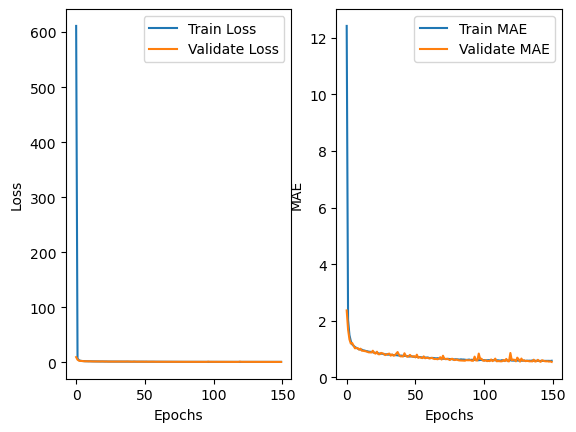

In [33]:
#plots




fig,axes = plt.subplots(nrows=1, ncols=2)
#The train and validate loss across different epochs.
axes[0].plot(range(N_epochs), losses, label = 'Train Loss')
axes[0].plot(range(N_epochs), validate_losses, label = 'Validate Loss')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

#The train and validate metric (accuracy metric) across different epochs
axes[1].plot(range(N_epochs), maes, label = 'Train MAE')
axes[1].plot(range(N_epochs), validate_maes, label = 'Validate MAE')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAE")
axes[1].legend()

In [34]:
#load the best model and calculate test accuracy
mybestmodel = myMultiLayerPerceptron(x_train.shape[1],1)
mybestmodel.load_state_dict(torch.load("current_best_model"))

test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle=True)
test_batch_mae = []
for x_batch, y_batch in test_dataloader:
    prediction_score = mybestmodel(x_batch)
    
    #prediction_label = torch.argmax(prediction_score.detach(),dim=1).numpy()
    #test_batch_mae.append( np.sum(prediction_label == y_batch.numpy())/x_batch.shape[0])
    
    test_batch_mae.append(mean_absolute_error(prediction_score.detach().numpy(), y_batch.numpy()))
    
test_mae = np.mean(np.array(test_batch_mae))

print(f"Test mae = {test_mae}")

Test mae = 0.5421456098556519


In [35]:
#2nd model for Pytorch: Linear Regression
from torch import nn

class MyLinearRegressionModel(nn.Module): 
    def __init__(self,d): # d is the dimension of the input
        super(MyLinearRegressionModel,self).__init__()   # call the init function of super class
        self.w = nn.Parameter(torch.zeros(1,d, dtype=torch.float)) 
        self.b = nn.Parameter(torch.zeros(1,dtype=torch.float))
    def forward(self,x):
        # The main purpose of the forward function is to specify given input x, how the output is calculated. 
        return torch.inner(x,self.w) + self.b

In [37]:

#mymodel = myMultiLayerPerceptron(x_train.shape[1],1)
mymodel_lr = MyLinearRegressionModel(x_train.shape[1])

#hyper parameters
lr = 0.001
batch_size = 64
N_epochs = 150

#create loss function, use mean-squared-error (MSE) as loss function
    #loss_fun = nn.CrossEntropyLoss()
loss_fun = nn.MSELoss()

#the mae metric used in the model
def mean_absolute_error(predictions, targets):
    return np.mean(np.abs(predictions - targets))

# Create dataloaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
validate_dataloader = DataLoader(validation_dataset,batch_size = batch_size,shuffle = True)

# Create optimizer
optimizer = torch.optim.Adam(mymodel_lr.parameters(), lr = lr) 

losses = []
#accuracies = []
maes = []

validate_losses = []
#validate_accuracies = []
#Use Mean-absolute-error as metric
train_maes = []
validate_maes = []

current_best_mae = float('inf')

for epoch in range(N_epochs):
    #Train loop:
    batch_loss = []
    #batch_accuracy = []
    batch_mae = []
    for x_batch, y_batch in train_dataloader:
        x_batch = x_batch.float()
        y_batch = y_batch.float()
        prediction_score = mymodel_lr(x_batch)
        
        prediction_score = prediction_score.view(-1)
        
        loss = loss_fun(prediction_score,y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        batch_loss.append(loss.detach().numpy())
        
        #prediction_label = torch.argmax(prediction_score.detach(),dim=1).numpy()
        #batch_accuracy.append(np.sum(prediction_label == y_batch.numpy())/x_batch.shape[0])
        batch_mae.append(mean_absolute_error(prediction_score.detach().numpy(), y_batch.numpy()))
        
    #validation loop
    validate_batch_loss = []
    #validate_batch_accuracy = []
    validate_batch_mae = []
    for x_batch, y_batch in validate_dataloader:
        x_batch = x_batch.float()
        y_batch = y_batch.float()
        prediction_score = mymodel_lr(x_batch)
        
        prediction_score = prediction_score.view(-1)
        
        loss = loss_fun(prediction_score, y_batch)
        
        validate_batch_loss.append(loss.detach())
        
        #prediction_label = torch.argmax(prediction_score.detach(),dim=1).numpy()
        #validate_batch_accuracy.append(np.sum(prediction_label == y_batch.numpy()) / x_batch.shape[0])
        validate_batch_mae.append(mean_absolute_error(prediction_score.detach().numpy(), y_batch.numpy()))
    
    #End of epoch processing
    losses.append(np.mean(np.array(batch_loss)))
    validate_losses.append(np.mean(np.array(validate_batch_loss)))
    
    #use mae metric
        #accuracies.append(np.mean(np.array(batch_accuracy)))
        #validate_accuracies.append(np.mean(np.array(validate_batch_accuracy)))
    maes.append(np.mean(np.array(batch_mae)))
    validate_maes.append(np.mean(np.array(validate_batch_mae)))
    
    #print the progress of this epoch
    if epoch%10 == 0:
        print(f"Epoch = {epoch}, train_loss = {losses[-1]}, validate_loss = {validate_losses[-1]}")
        #print(f"Train MAE = {np.round(maes[-1]*100,2)}, validate mae = {np.round(validate_maes[-1]*100,2)} ")
        print(f"Train MAE = {maes[-1]}, validate mae = {maes[-1]} ")
    
    #save the best model
    if validate_maes[-1] < current_best_mae:
        #print("Current epoch is the best so far, saving model...")
        torch.save(mymodel_lr.state_dict(), 'current_best_model_lr')
        current_best_mae = validate_maes[-1]

Epoch = 0, train_loss = 614.3473510742188, validate_loss = 19.27695083618164
Train MAE = 16.769084930419922, validate mae = 16.769084930419922 
Epoch = 10, train_loss = 6.147282123565674, validate_loss = 5.804250240325928
Train MAE = 1.9458668231964111, validate mae = 1.9458668231964111 
Epoch = 20, train_loss = 4.010857582092285, validate_loss = 3.958000659942627
Train MAE = 1.5735689401626587, validate mae = 1.5735689401626587 
Epoch = 30, train_loss = 3.556251287460327, validate_loss = 3.5492019653320312
Train MAE = 1.478345513343811, validate mae = 1.478345513343811 
Epoch = 40, train_loss = 3.415771722793579, validate_loss = 3.4159045219421387
Train MAE = 1.4472252130508423, validate mae = 1.4472252130508423 
Epoch = 50, train_loss = 3.375168561935425, validate_loss = 3.4919257164001465
Train MAE = 1.4368585348129272, validate mae = 1.4368585348129272 
Epoch = 60, train_loss = 3.3531785011291504, validate_loss = 3.3822879791259766
Train MAE = 1.4322015047073364, validate mae = 1.4

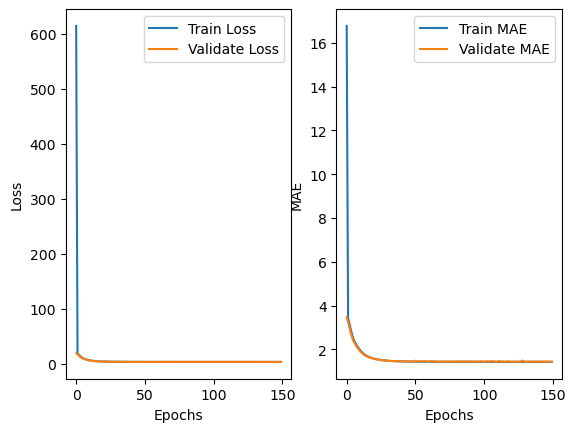

In [38]:
#plots




fig,axes = plt.subplots(nrows=1, ncols=2)
#The train and validate loss across different epochs.
axes[0].plot(range(N_epochs), losses, label = 'Train Loss')
axes[0].plot(range(N_epochs), validate_losses, label = 'Validate Loss')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

#The train and validate metric (accuracy metric) across different epochs
axes[1].plot(range(N_epochs), maes, label = 'Train MAE')
axes[1].plot(range(N_epochs), validate_maes, label = 'Validate MAE')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAE")
axes[1].legend()

In [39]:
#load the best model and calculate test accuracy
mybestmodel = MyLinearRegressionModel(x_train.shape[1])
mybestmodel.load_state_dict(torch.load("current_best_model_lr"))

test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle=True)
test_batch_mae = []
for x_batch, y_batch in test_dataloader:
    prediction_score = mybestmodel(x_batch)
    
    #prediction_label = torch.argmax(prediction_score.detach(),dim=1).numpy()
    #test_batch_mae.append( np.sum(prediction_label == y_batch.numpy())/x_batch.shape[0])
    
    test_batch_mae.append(mean_absolute_error(prediction_score.detach().numpy(), y_batch.numpy()))
    
test_mae = np.mean(np.array(test_batch_mae))

print(f"Test mae = {test_mae}")

Test mae = 1.4390530586242676


In [41]:
#Grant's Random tree forest

In [42]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
import matplotlib.pyplot as plt


# Prepare your datasets: df_train, df_validation, df_test

# Step 1: Train the model on the training dataset and report RMSE
rf_train = RandomForestRegressor(featuresCol='features', labelCol='outcome')
rf_train_model = rf_train.fit(df_train)
rf_train_predictions = rf_train_model.transform(df_test)

# Evaluator with RMSE metric
evaluator_rmse = RegressionEvaluator(predictionCol="prediction", labelCol="outcome", metricName="rmse")

# Report RMSE on the test set
rmse_train = evaluator_rmse.evaluate(rf_train_predictions)
print("RMSE on Test Data before fine tuning hyperparameters, trained on train dataset:", rmse_train)

# Step 2: Fine-tune hyperparameters on the validation dataset
rf = RandomForestRegressor(featuresCol='features', labelCol='outcome')
paramGrid = ParamGridBuilder() \
                .addGrid(rf.numTrees, [5, 10, 15]) \
                .addGrid(rf.maxDepth, [3, 5, 7]) \
                .build()

crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator_rmse,
                          numFolds=3)

# Fit the model with tuning
rf_cvModel = crossval.fit(df_validation)

RMSE on Test Data before fine tuning hyperparameters, trained on train dataset: 1.5176914614769217


In [43]:
# Fetch the best model and its hyperparameters
best_rfModel = rf_cvModel.bestModel

# Extract best hyperparameters
best_numTrees = best_rfModel.getNumTrees
best_maxDepth = best_rfModel.getMaxDepth

# Print the best hyperparameters
print("Best number of trees:", best_numTrees)
print("Best maximum depth:", best_maxDepth())

Best number of trees: 15
Best maximum depth: 7


In [44]:
# Create a new model with the best hyperparameters
rf_retrained = RandomForestRegressor(featuresCol='features', labelCol='outcome', 
                                     numTrees=best_numTrees, maxDepth=best_maxDepth())

# Retrain the model on the combined dataset
rf_final_model = rf_retrained.fit(df_train)

# Evaluate the final model on the test dataset
rf_final_predictions = rf_final_model.transform(df_test)
rmse_final = evaluator_rmse.evaluate(rf_final_predictions)
print("Final Model RMSE on Test Data:", rmse_final)


Final Model RMSE on Test Data: 1.1030506747874136


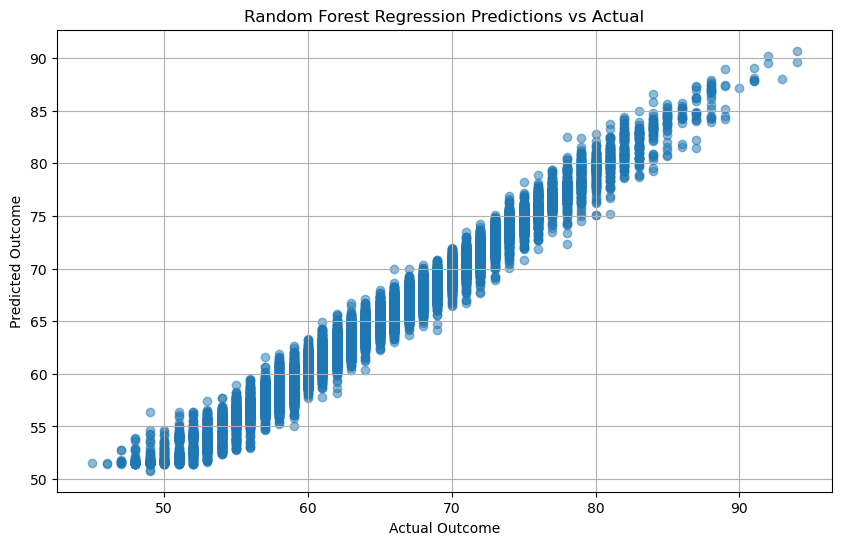

In [45]:


# Convert the predictions DataFrame to a Pandas DataFrame for easier plotting
pd_rf_predictions = rf_final_predictions.select("prediction", "outcome").toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pd_rf_predictions['outcome'], pd_rf_predictions['prediction'], alpha=0.5)
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title('Random Forest Regression Predictions vs Actual')
plt.grid(True)
plt.show()


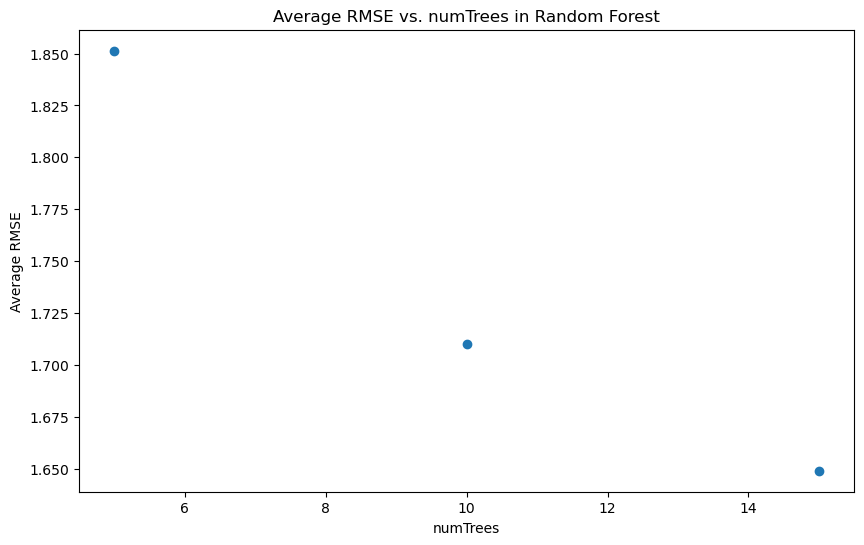

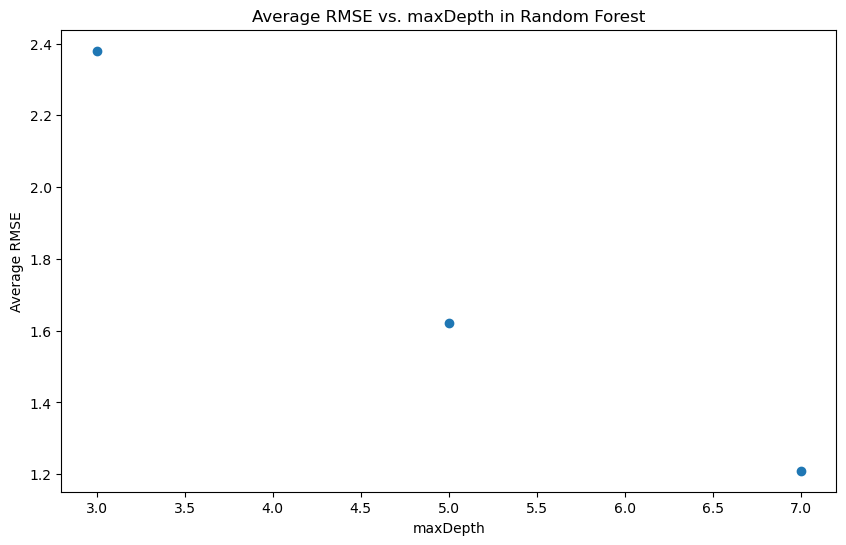

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def plot_hyperparam_performance(params, metrics, param_name):
    # Create a dictionary to store the sum of metrics and count for each unique param value
    avg_metrics = {}
    for param_map, metric in zip(params, metrics):
        value = param_map[param_name]
        if value in avg_metrics:
            avg_metrics[value]['sum'] += metric
            avg_metrics[value]['count'] += 1
        else:
            avg_metrics[value] = {'sum': metric, 'count': 1}
    
    # Calculate average metrics for each param value
    avg_values = list(avg_metrics.keys())
    avg_metrics = [avg_metrics[value]['sum'] / avg_metrics[value]['count'] for value in avg_values]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    if param_name == 'numTrees':
        plt.scatter(avg_values, avg_metrics)
    elif param_name == 'maxDepth':
        plt.scatter(avg_values, avg_metrics)
    else:
        plt.plot(avg_values, avg_metrics, marker='o')
    
    plt.xlabel(param_name)
    plt.ylabel('Average RMSE')
    plt.title(f'Average RMSE vs. {param_name} in Random Forest')
    plt.show()

# Example usage with your data
params = [{param.name: value for param, value in param_map.items()} for param_map in rf_cvModel.getEstimatorParamMaps()]
metrics = rf_cvModel.avgMetrics

# Plot for numTrees
plot_hyperparam_performance(params, metrics, 'numTrees')

# Plot for maxDepth
plot_hyperparam_performance(params, metrics, 'maxDepth')


In [47]:
# now do the same for SVM regression

In [48]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
import matplotlib.pyplot as plt

# Assuming you have already created a SparkSession called spark

# Prepare your datasets: df_train, df_validation, df_test, df_combined

# Step 1: Train the model on the training dataset and report RMSE
svm_train = LinearRegression(featuresCol='features', labelCol='outcome', maxIter=10, regParam=0.3, elasticNetParam=0.8)
svm_train_model = svm_train.fit(df_train)
svm_train_predictions = svm_train_model.transform(df_test)

# Evaluator with RMSE metric
evaluator_rmse = RegressionEvaluator(predictionCol="prediction", labelCol="outcome", metricName="rmse")

# Report RMSE on the test set
rmse_train = evaluator_rmse.evaluate(svm_train_predictions)
print("RMSE on Test Data before fine tuning hyperparameters, trained on train dataset:", rmse_train)


23/11/15 15:45:24 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


RMSE on Test Data before fine tuning hyperparameters, trained on train dataset: 2.0274209175735853


In [49]:
# Step 2: Fine-tune hyperparameters on the validation dataset
svm = LinearRegression(featuresCol='features', labelCol='outcome')

paramGrid = ParamGridBuilder() \
                .addGrid(svm.regParam, [0.1, 0.01]) \
                .addGrid(svm.maxIter, [10, 15, 20]) \
                .addGrid(svm.elasticNetParam, [0.0, 0.5, 1.0]) \
                .build()

crossval = CrossValidator(estimator=svm,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator_rmse,
                          numFolds=3)

# Fit the model with tuning
svm_cvModel = crossval.fit(df_validation)
# Fetch the best model and its hyperparameters
best_svmModel = svm_cvModel.bestModel

# Extract best hyperparameters
best_regParam = best_svmModel.getRegParam()
best_maxIter = best_svmModel.getMaxIter()
best_elasticNetParam = best_svmModel.getElasticNetParam()

# Print the best hyperparameters
print("Best regularization parameter:", best_regParam)
print("Best maximum iterations:", best_maxIter)
print("Best elastic net parameter:", best_elasticNetParam)


23/11/15 15:46:02 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Best regularization parameter: 0.01
Best maximum iterations: 10
Best elastic net parameter: 0.0


In [50]:
# Create a new model with the best hyperparameters
svm_retrained = LinearRegression(featuresCol='features', labelCol='outcome', 
                                 maxIter=best_maxIter, regParam=best_regParam, elasticNetParam=best_elasticNetParam)

# Retrain the model on the combined dataset
svm_final_model = svm_retrained.fit(df_train)

# Evaluate the final model on the test dataset
svm_final_predictions = svm_final_model.transform(df_test)
rmse_final_svm = evaluator_rmse.evaluate(svm_final_predictions)
print("Final Model RMSE on Test Data:", rmse_final_svm)

Final Model RMSE on Test Data: 1.8126846196954598


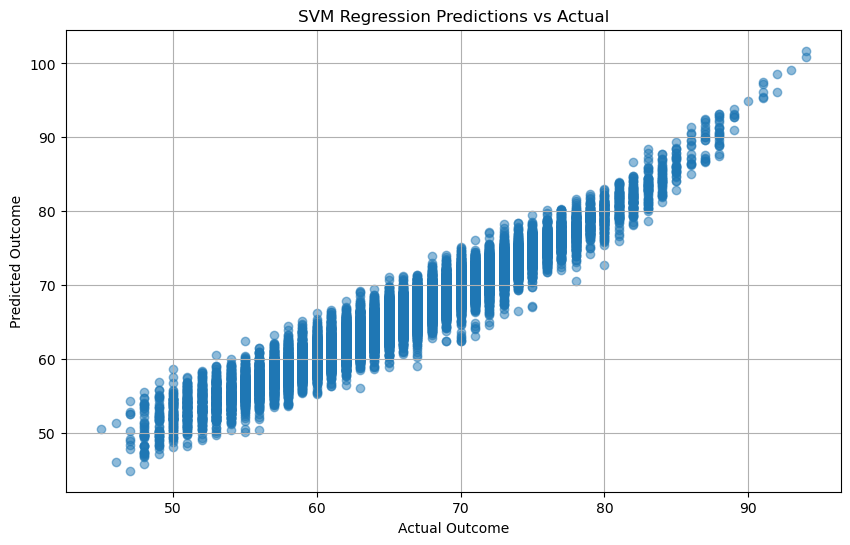

In [51]:
# plot 
# Convert the predictions DataFrame to a Pandas DataFrame for easier plotting
pd_predictions = svm_final_predictions.select("prediction", "outcome").toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pd_predictions['outcome'], pd_predictions['prediction'], alpha=0.5)
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title('SVM Regression Predictions vs Actual')
plt.grid(True)
plt.show()

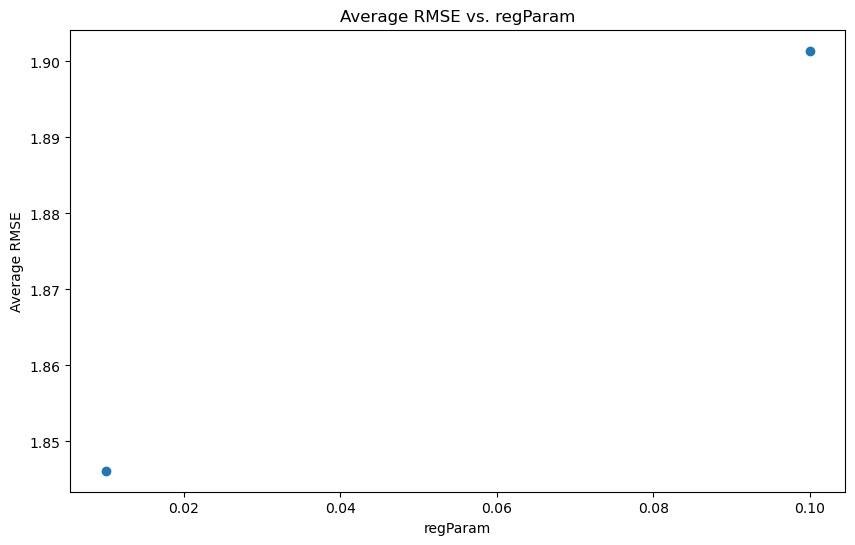

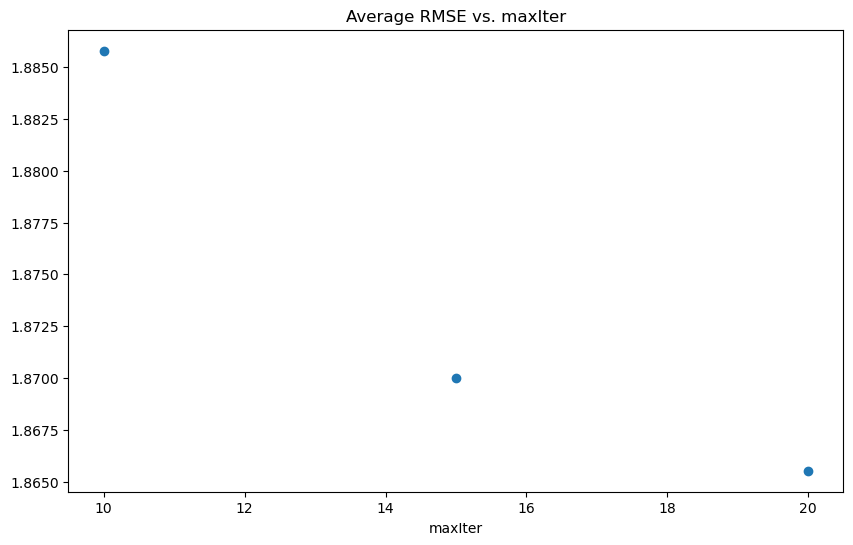

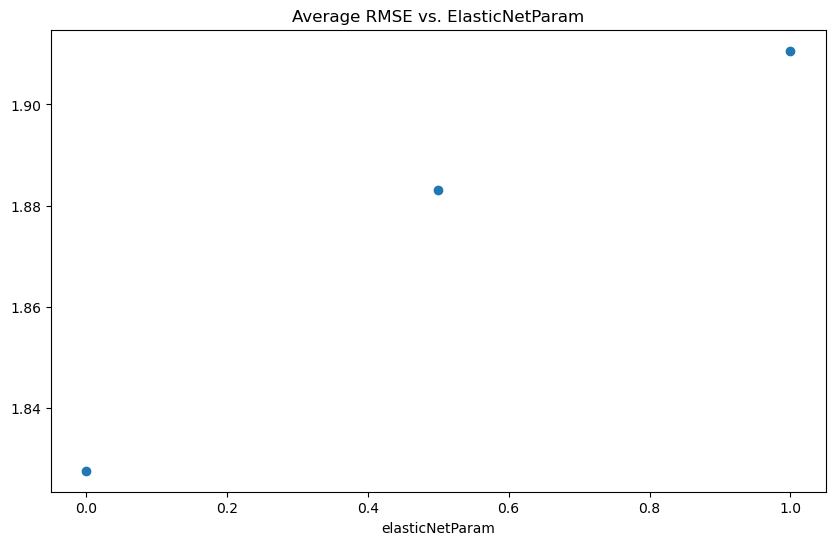

In [52]:
# Extract parameter maps and corresponding RMSE
params = [{param.name: value for param, value in param_map.items()} for param_map in svm_cvModel.getEstimatorParamMaps()]
rmse_scores = svm_cvModel.avgMetrics

# Prepare data for plotting
param_rmse = []

for param in params:
    param['rmse'] = rmse_scores[params.index(param)]
    param_rmse.append(param)

# Calculate average RMSE for each hyperparameter value
def average_rmse(param_name):
    unique_values = set(param[param_name] for param in param_rmse)
    avg_rmse = {value: np.mean([p['rmse'] for p in param_rmse if p[param_name] == value]) for value in unique_values}
    return avg_rmse

avg_rmse_regParam = average_rmse('regParam')
avg_rmse_maxIter = average_rmse('maxIter')
avg_rmse_elasticNetParam = average_rmse('elasticNetParam')

# Plotting
plt.figure(figsize=(10, 6))
# regParam
plt.scatter(list(avg_rmse_regParam.keys()), list(avg_rmse_regParam.values()), marker='o')
plt.xlabel('regParam')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. regParam')
plt.show()

# maxIter
plt.figure(figsize=(10, 6))
plt.scatter(list(avg_rmse_maxIter.keys()), list(avg_rmse_maxIter.values()), marker='o')
plt.xlabel('maxIter')
plt.title('Average RMSE vs. maxIter')
plt.show()

# elasticNetParam
plt.figure(figsize=(10, 6))
plt.scatter(list(avg_rmse_elasticNetParam.keys()), list(avg_rmse_elasticNetParam.values()), marker='o')
plt.xlabel('elasticNetParam')
plt.title('Average RMSE vs. ElasticNetParam')
plt.show()

